
# Machine Learning Internship task

Welcome folks, Thank you for applying for this internship and we are super excited to take this conversation ahead with you.

But before we go ahead, we would like you to go thru a small assessment, which will help us to evaluate you better on technical skills and working styles.


## Task Objective :
* [ ] Perform EDA on the given [data](https://github.com/geniusai-research/interns_task/blob/main/taskdata.csv).
* [ ] Build some new features which makes sense for the learning objective.
* [ ] Train any classifier (can be any model of your choice XGB,DNNs, etc) 
* [ ] Implement SHAP on this model to explain the decisions. (`Bonus points`) 
* [ ] Submit the task by creating a PR request on this [repository](https://github.com/geniusai-research/interns_task/).

## Instructions :
* Perform all the tasks mentioned above.
* Maintain a single **JupyterNotebook** which has all the descriptions and code in it. 
* Notebook needs to be properly structured .
* Code needs to reproducible.

**We will only accept the assignment if its in a single Notebook or else it will be rejected.**

## Important dates
The assignments needs to be completed in 1 week from today. <br>
**Deadline : 28th October**


If you have any issue then feel free to create issue on this [repository](https://github.com/geniusai-research/interns_task/) or reachout to us over the internshala chat.

<hr>

Cheers!!!  <br>
RK 


In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import time

/home/abhay/anaconda3/lib/python3.7/site-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
data=pd.read_csv("taskdata.csv")

In [3]:
data.head()

,user_id,account_id,max_return_days,average_return_days,customer_since_months,total_revenue,average_revenue,avg_vas_count,avg_used_vas_value,business_type,avg_wallet_bonus,avg_active_ads,avg_new_ads,avg_email_replies,avg_call_replies,avg_sms_replies,target
0,410039,496.0,8,1.500000,14,0.0,0.0,3.666667,66.666667,0,300.0,79.333333,15.250000,32.416667,27.916667,0.250000,0
1,410240,499.0,37,8.200000,10,0.0,0.0,4.900000,114.000000,0,0.0,232.100000,18.300000,16.200000,13.800000,0.000000,0
2,411764,493.0,9,1.533333,15,0.0,0.0,5.333333,106.666667,0,150.0,55.083333,3.750000,20.250000,24.500000,0.000000,0
3,411985,262.0,1,1.000000,14,0.0,0.0,6.307692,176.153846,0,1481.0,409.538462,80.769231,87.461538,57.615385,0.000000,1
4,412071,496.0,1,1.000000,18,0.0,0.0,5.846154,109.230769,0,41.5,48.230769,1.692308,17.461538,25.769231,0.230769,0


In [4]:
data.tail()

,user_id,account_id,max_return_days,average_return_days,customer_since_months,total_revenue,average_revenue,avg_vas_count,avg_used_vas_value,business_type,avg_wallet_bonus,avg_active_ads,avg_new_ads,avg_email_replies,avg_call_replies,avg_sms_replies,target
4402,73498690100,113.0,1,1.0,4,0.00,0.00,0.0,0.0,3,0.0,4.666667,2.0,9.666667,14.666667,0.333333,0
4403,73519239100,1017.0,1,1.0,2,0.00,0.00,0.0,0.0,4,0.0,153.000000,76.5,9.000000,11.500000,0.000000,0
4404,73525763100,226.0,1,1.0,2,0.00,0.00,0.0,0.0,1,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0
4405,73538605100,226.0,1,1.0,2,551.19,551.19,7.0,70.0,1,0.0,17.000000,17.0,10.000000,8.000000,0.000000,0
4406,73560305100,1017.0,1,1.0,4,0.00,0.00,0.0,0.0,0,240.0,1.000000,1.0,0.000000,0.000000,0.000000,0


In [5]:
data.shape

(4407, 17)

In [6]:
data.describe()

,user_id,account_id,max_return_days,average_return_days,customer_since_months,total_revenue,average_revenue,avg_vas_count,avg_used_vas_value,business_type,avg_wallet_bonus,avg_active_ads,avg_new_ads,avg_email_replies,avg_call_replies,avg_sms_replies,target
count,4.407000e+03,4400.000000,4407.000000,4407.000000,4407.000000,4407.000000,4407.000000,4407.000000,4407.000000,4407.000000,4407.000000,4407.000000,4407.000000,4407.000000,4407.000000,4407.000000,4407.000000
mean,4.106655e+09,506.553864,22.335602,7.171576,9.874064,194.130365,16.942615,3.249388,72.119006,0.497844,338.851046,98.922260,16.812003,25.681004,27.622151,0.162009,0.103245
std,6.794948e+09,326.072756,43.591246,19.209092,5.169639,1548.361547,128.268824,5.509869,117.019515,1.199725,831.746150,297.692950,68.045904,55.324218,61.069006,0.517693,0.304313
min,4.100390e+05,111.000000,1.000000,0.500000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,6.184510e+08,226.000000,1.000000,1.000000,5.000000,0.000000,0.000000,0.142857,2.727273,0.000000,0.000000,13.500000,2.500000,4.461538,4.384615,0.000000,0.000000
50%,7.296626e+08,493.000000,2.000000,1.076923,12.000000,0.000000,0.000000,2.000000,45.000000,0.000000,40.000000,40.000000,6.333333,12.266667,12.933333,0.000000,0.000000
75%,7.292936e+09,1005.000000,30.000000,5.666667,14.000000,0.000000,0.000000,4.333333,100.000000,0.000000,327.280000,101.291667,14.250000,28.000000,30.784615,0.153846,0.000000
max,7.356031e+10,1017.000000,354.000000,354.000000,24.000000,43957.172700,3852.727273,156.583333,3357.500000,5.000000,15606.500000,9183.866667,2606.000000,1716.400000,1743.266667,14.636364,1.000000


In [7]:
data.columns

Index(['user_id', 'account_id', 'max_return_days', 'average_return_days',
       'customer_since_months', 'total_revenue', 'average_revenue',
       'avg_vas_count', 'avg_used_vas_value', 'business_type',
       'avg_wallet_bonus', 'avg_active_ads', 'avg_new_ads',
       'avg_email_replies', 'avg_call_replies', 'avg_sms_replies', 'target'],
      dtype='object')

In [8]:
data.nunique()

user_id                  4407
account_id                 15
max_return_days           229
average_return_days       917
customer_since_months      23
total_revenue             434
average_revenue           510
avg_vas_count             677
avg_used_vas_value       1027
business_type               6
avg_wallet_bonus          989
avg_active_ads           2757
avg_new_ads              1422
avg_email_replies        1900
avg_call_replies         1932
avg_sms_replies           140
target                      2
dtype: int64

In [9]:
data.isnull().sum()

user_id                  0
account_id               7
max_return_days          0
average_return_days      0
customer_since_months    0
total_revenue            0
average_revenue          0
avg_vas_count            0
avg_used_vas_value       0
business_type            0
avg_wallet_bonus         0
avg_active_ads           0
avg_new_ads              0
avg_email_replies        0
avg_call_replies         0
avg_sms_replies          0
target                   0
dtype: int64

In [10]:
data_1=data.dropna()

In [11]:
data_1.isnull().sum()

user_id                  0
account_id               0
max_return_days          0
average_return_days      0
customer_since_months    0
total_revenue            0
average_revenue          0
avg_vas_count            0
avg_used_vas_value       0
business_type            0
avg_wallet_bonus         0
avg_active_ads           0
avg_new_ads              0
avg_email_replies        0
avg_call_replies         0
avg_sms_replies          0
target                   0
dtype: int64

Dropping columns user id and account id

In [12]:
y=data_1.target   # saving target as in variable y
list = ['user_id','account_id','target']
x = data_1.drop(list,axis = 1 )

In [13]:
x.head()

,max_return_days,average_return_days,customer_since_months,total_revenue,average_revenue,avg_vas_count,avg_used_vas_value,business_type,avg_wallet_bonus,avg_active_ads,avg_new_ads,avg_email_replies,avg_call_replies,avg_sms_replies
0,8,1.500000,14,0.0,0.0,3.666667,66.666667,0,300.0,79.333333,15.250000,32.416667,27.916667,0.250000
1,37,8.200000,10,0.0,0.0,4.900000,114.000000,0,0.0,232.100000,18.300000,16.200000,13.800000,0.000000
2,9,1.533333,15,0.0,0.0,5.333333,106.666667,0,150.0,55.083333,3.750000,20.250000,24.500000,0.000000
3,1,1.000000,14,0.0,0.0,6.307692,176.153846,0,1481.0,409.538462,80.769231,87.461538,57.615385,0.000000
4,1,1.000000,18,0.0,0.0,5.846154,109.230769,0,41.5,48.230769,1.692308,17.461538,25.769231,0.230769


In [14]:
x.describe()

,max_return_days,average_return_days,customer_since_months,total_revenue,average_revenue,avg_vas_count,avg_used_vas_value,business_type,avg_wallet_bonus,avg_active_ads,avg_new_ads,avg_email_replies,avg_call_replies,avg_sms_replies
count,4400.000000,4400.000000,4400.000000,4400.000000,4400.000000,4400.000000,4400.000000,4400.000000,4400.000000,4400.000000,4400.000000,4400.000000,4400.000000,4400.000000
mean,22.362500,7.174561,9.884545,194.439208,16.969570,3.253853,72.217150,0.496591,339.299218,98.992841,16.768863,25.711065,27.655640,0.162266
std,43.618703,19.219665,5.163509,1549.573607,128.369056,5.512943,117.082250,1.198236,832.312947,297.898133,67.975094,55.361244,61.110202,0.518064
min,1.000000,0.500000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,1.000000,5.000000,0.000000,0.000000,0.153846,2.964286,0.000000,0.000000,13.538462,2.500000,4.490385,4.412500,0.000000
50%,2.000000,1.076923,12.000000,0.000000,0.000000,2.000000,45.000000,0.000000,41.500000,40.000000,6.333333,12.307692,13.000000,0.000000
75%,30.000000,5.666667,14.000000,0.000000,0.000000,4.358766,100.000000,0.000000,328.275000,101.333333,14.250000,28.000000,30.804545,0.153846
max,354.000000,354.000000,24.000000,43957.172700,3852.727273,156.583333,3357.500000,5.000000,15606.500000,9183.866667,2606.000000,1716.400000,1743.266667,14.636364


Number of one:  454
Number of zero :  3946


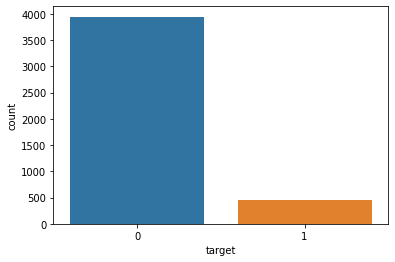

In [15]:
#plotting graph target
ax = sns.countplot(y,label="Count")     
zero, one = y.value_counts()
print('Number of one: ',one)
print('Number of zero : ',zero)

# lets make violin plot in order to get better understanding

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 <a list of 10 Text major ticklabel objects>)

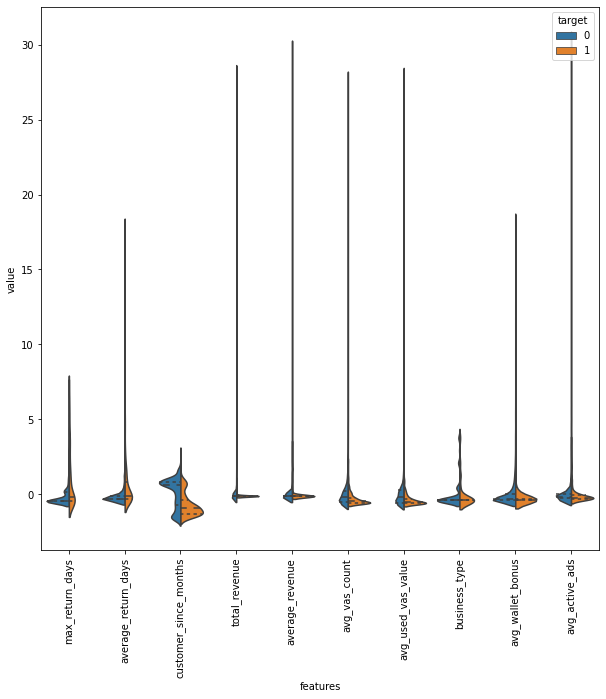

In [16]:
# first ten features
data_tar = y
data = x.iloc[:,:-1]
data_n_2 = (data - data.mean()) / (data.std())              # standardization
data = pd.concat([y,data_n_2.iloc[:,0:10]],axis=1)
data = pd.melt(data,id_vars="target",
                    var_name="features",
                    value_name='value')
plt.figure(figsize=(10,10))
sns.violinplot(x="features", y="value", hue="target", data=data,split=True, inner="quart")
plt.xticks(rotation=90)

(array([0, 1, 2]), <a list of 3 Text major ticklabel objects>)

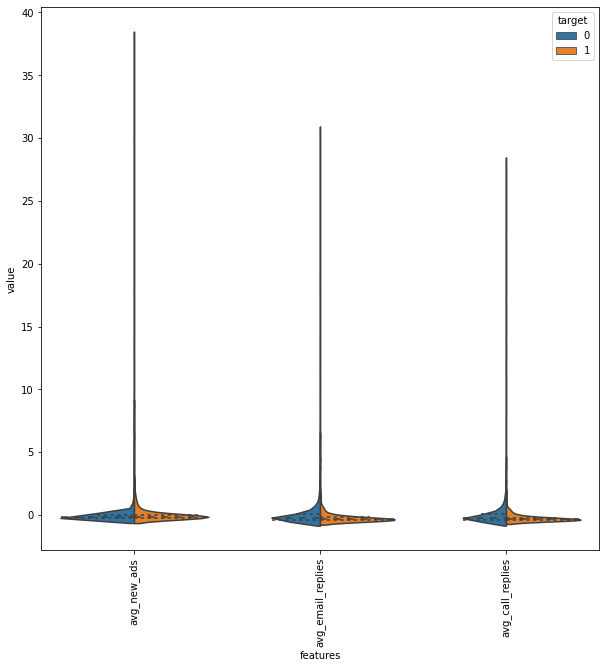

In [17]:
# remaining ones
data = pd.concat([y,data_n_2.iloc[:,10:13]],axis=1)
data = pd.melt(data,id_vars="target",
                    var_name="features",
                    value_name='value')
plt.figure(figsize=(10,10))
sns.violinplot(x="features", y="value", hue="target", data=data,split=True, inner="quart")
plt.xticks(rotation=90)

In [18]:
# as you can  avg_email_replies,avg call_replies graph is same they are co-related . But we still need to get more infor

In [19]:
#Lets plot pair grid with similar like graph features to get more info

/home/abhay/anaconda3/lib/python3.7/site-packages/statsmodels/nonparametric/kernels.py:128: RuntimeWarning: divide by zero encountered in true_divide
  return (1. / np.sqrt(2 * np.pi)) * np.exp(-(Xi - x)**2 / (h**2 * 2.))
/home/abhay/anaconda3/lib/python3.7/site-packages/statsmodels/nonparametric/kernels.py:128: RuntimeWarning: invalid value encountered in true_divide
  return (1. / np.sqrt(2 * np.pi)) * np.exp(-(Xi - x)**2 / (h**2 * 2.))
/home/abhay/anaconda3/lib/python3.7/site-packages/statsmodels/nonparametric/_kernel_base.py:516: RuntimeWarning: invalid value encountered in true_divide
  dens = Kval.prod(axis=1) / np.prod(bw[iscontinuous])
/home/abhay/anaconda3/lib/python3.7/site-packages/matplotlib/contour.py:1483: UserWarning: Warning: converting a masked element to nan.
  self.zmax = float(z.max())
/home/abhay/anaconda3/lib/python3.7/site-packages/matplotlib/contour.py:1484: UserWarning: Warning: converting a masked element to nan.
  self.zmin = float(z.min())
/home/abhay/anacon

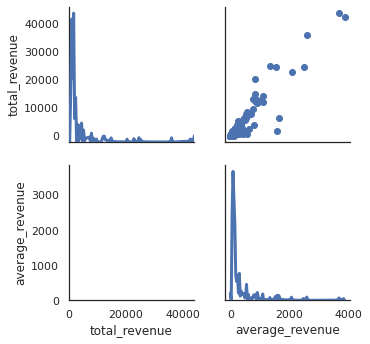

In [20]:
sns.set(style="white")
df = x[['total_revenue','average_revenue']]
g = sns.PairGrid(df, diag_sharey=False)
g.map_lower(sns.kdeplot, cmap="Blues_d")
g.map_upper(plt.scatter)
g.map_diag(sns.kdeplot, lw=3)

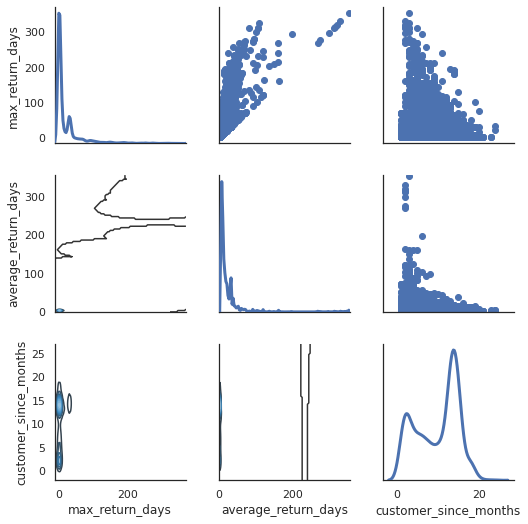

In [21]:
sns.set(style="white")
df = x[['max_return_days','average_return_days','customer_since_months']]
g = sns.PairGrid(df, diag_sharey=False)
g.map_lower(sns.kdeplot, cmap="Blues_d")
g.map_upper(plt.scatter)
g.map_diag(sns.kdeplot, lw=3)

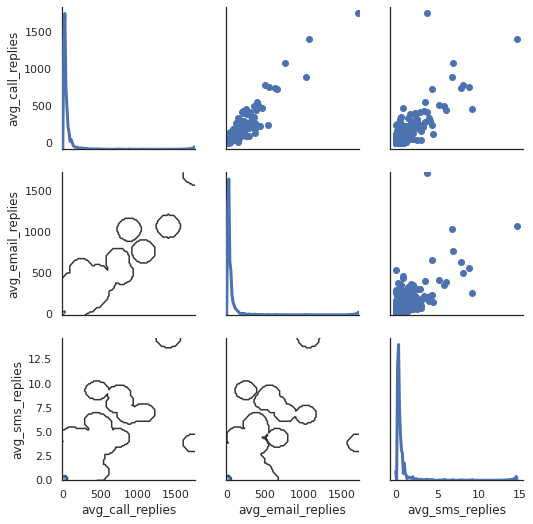

In [22]:
sns.set(style="white")
df = x[['avg_call_replies','avg_email_replies','avg_sms_replies']]
g = sns.PairGrid(df, diag_sharey=False)
g.map_lower(sns.kdeplot, cmap="Blues_d")
g.map_upper(plt.scatter)
g.map_diag(sns.kdeplot, lw=3)

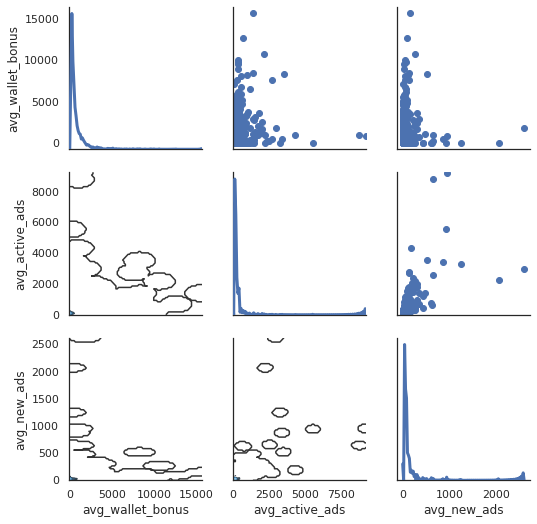

In [23]:
sns.set(style="white")
df = x[['avg_wallet_bonus','avg_active_ads','avg_new_ads']]
g = sns.PairGrid(df, diag_sharey=False)
g.map_lower(sns.kdeplot, cmap="Blues_d")
g.map_upper(plt.scatter)
g.map_diag(sns.kdeplot, lw=3)

In [24]:
x.head()

,max_return_days,average_return_days,customer_since_months,total_revenue,average_revenue,avg_vas_count,avg_used_vas_value,business_type,avg_wallet_bonus,avg_active_ads,avg_new_ads,avg_email_replies,avg_call_replies,avg_sms_replies
0,8,1.500000,14,0.0,0.0,3.666667,66.666667,0,300.0,79.333333,15.250000,32.416667,27.916667,0.250000
1,37,8.200000,10,0.0,0.0,4.900000,114.000000,0,0.0,232.100000,18.300000,16.200000,13.800000,0.000000
2,9,1.533333,15,0.0,0.0,5.333333,106.666667,0,150.0,55.083333,3.750000,20.250000,24.500000,0.000000
3,1,1.000000,14,0.0,0.0,6.307692,176.153846,0,1481.0,409.538462,80.769231,87.461538,57.615385,0.000000
4,1,1.000000,18,0.0,0.0,5.846154,109.230769,0,41.5,48.230769,1.692308,17.461538,25.769231,0.230769


In [25]:
# lets make scatter plot for better understanding

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], <a list of 10 Text major ticklabel objects>)

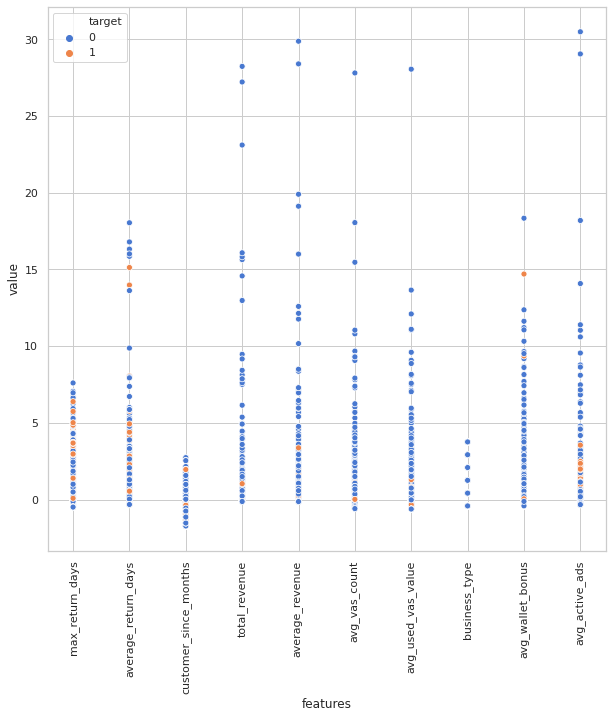

In [26]:
sns.set(style="whitegrid", palette="muted")
data_tar = y
data = x
data_n_2 = (data - data.mean()) / (data.std())              # standardization
data = pd.concat([y,data_n_2.iloc[:,0:10]],axis=1)
data = pd.melt(data,id_vars="target",
                    var_name="features",
                    value_name='value')
plt.figure(figsize=(10,10))
sns.scatterplot(x="features", y="value", hue="target", data=data)

plt.xticks(rotation=90)

([0, 1, 2], <a list of 3 Text major ticklabel objects>)

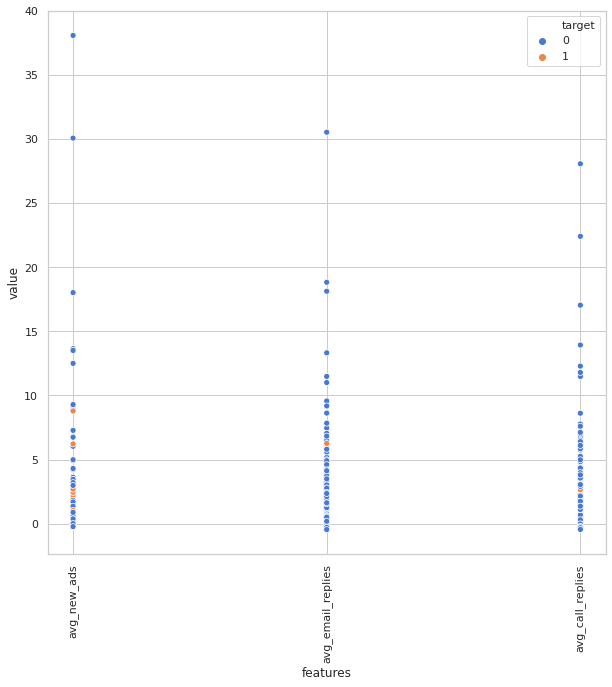

In [27]:
sns.set(style="whitegrid", palette="muted")
data_tar = y
data = x
data_n_2 = (data - data.mean()) / (data.std())              # standardization
data = pd.concat([y,data_n_2.iloc[:,10:13]],axis=1)
data = pd.melt(data,id_vars="target",
                    var_name="features",
                    value_name='value')
plt.figure(figsize=(10,10))
sns.scatterplot(x="features", y="value", hue="target", data=data)

plt.xticks(rotation=90)

In [28]:
# lets make pearson co-relation heat map to check higly poitive features

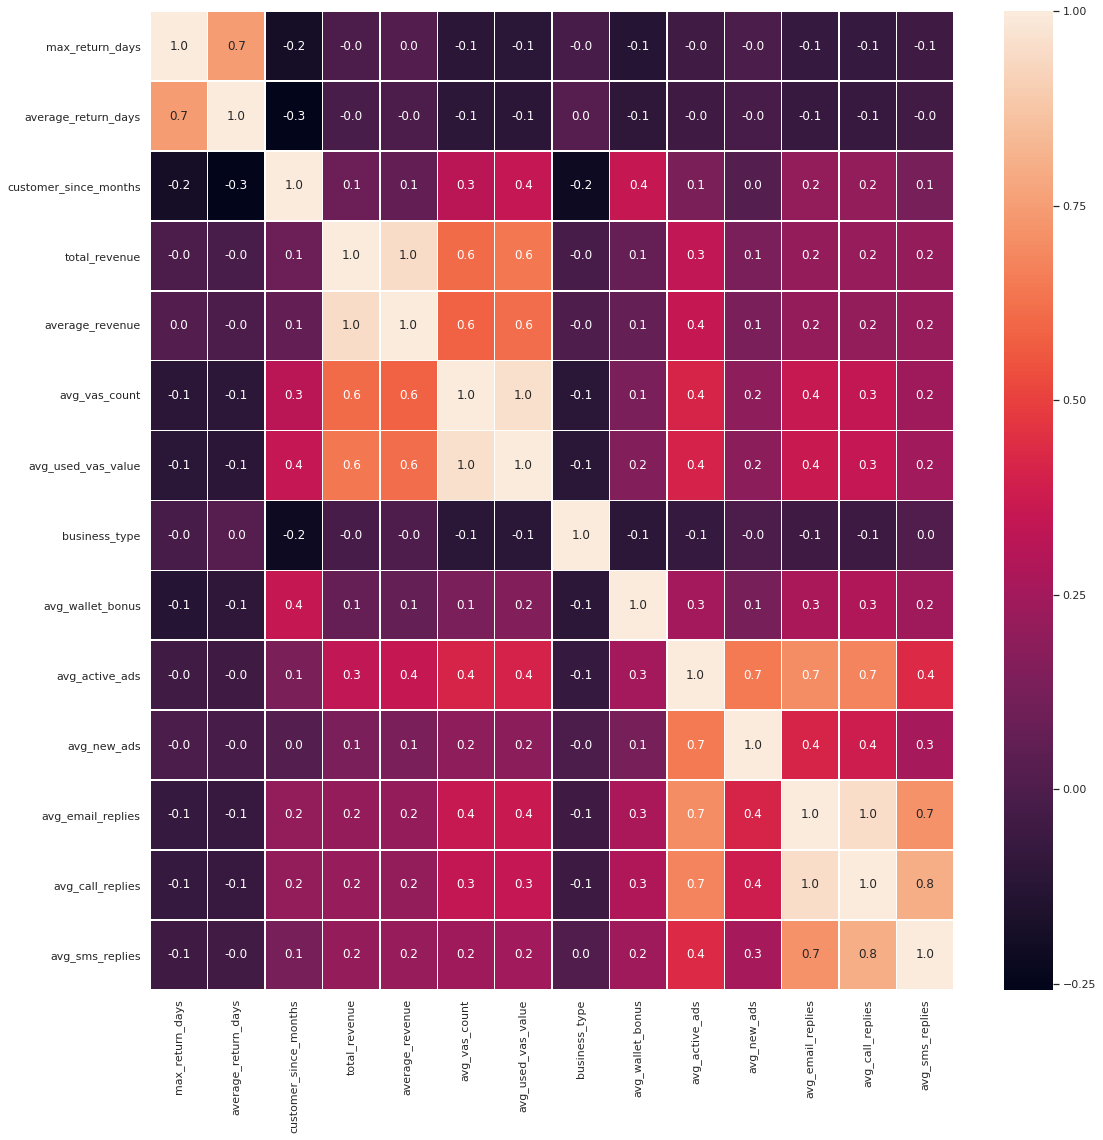

In [29]:
#correlation map
f,ax = plt.subplots(figsize=(18, 18))
sns.heatmap(x.corr(), annot=True, linewidths=.5, fmt= '.1f',ax=ax)

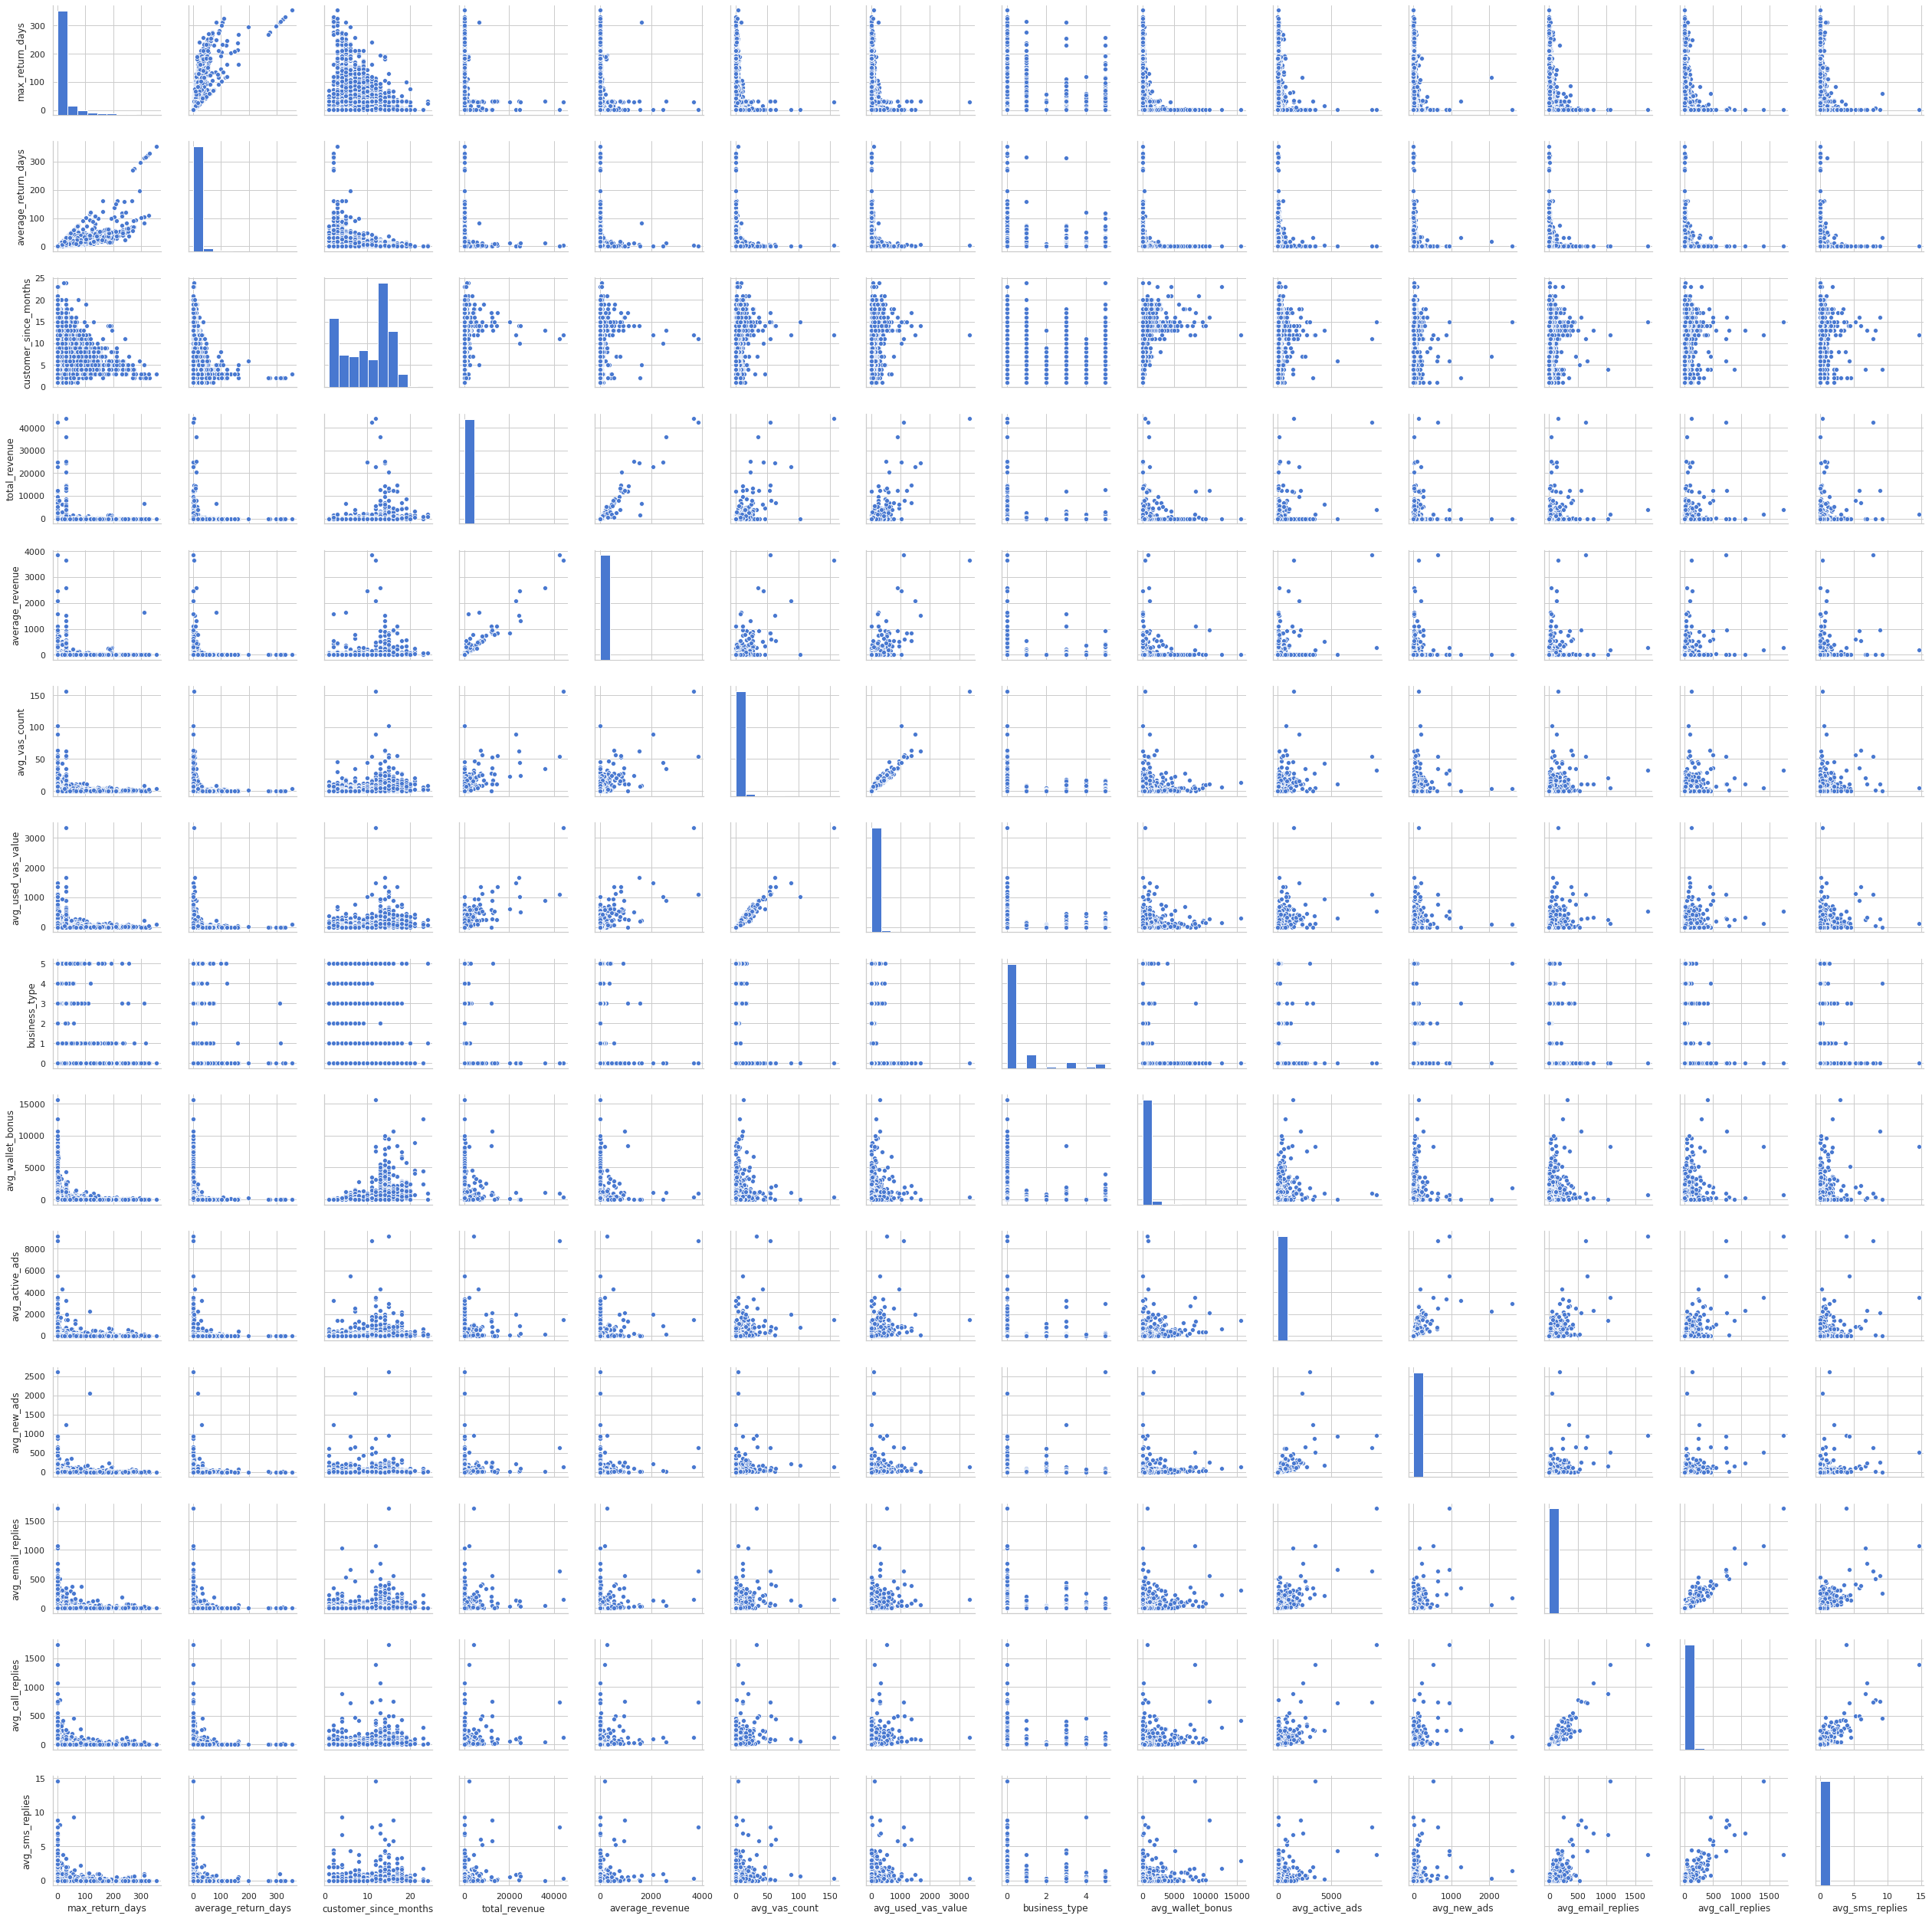

In [30]:
sns.pairplot(x)

In [31]:
# avg revenue and total revenue are highly co-related ,avg sms,email,call are also related,avg return days and max return days are also related,avg vas value and avg vas count
# so we will keep one of these features.

In [32]:
drop_list1 = ['average_revenue','avg_email_replies','average_return_days','avg_sms_replies','avg_vas_count']
x_1 = x.drop(drop_list1,axis = 1 )        
x_1.head()

,max_return_days,customer_since_months,total_revenue,avg_used_vas_value,business_type,avg_wallet_bonus,avg_active_ads,avg_new_ads,avg_call_replies
0,8,14,0.0,66.666667,0,300.0,79.333333,15.250000,27.916667
1,37,10,0.0,114.000000,0,0.0,232.100000,18.300000,13.800000
2,9,15,0.0,106.666667,0,150.0,55.083333,3.750000,24.500000
3,1,14,0.0,176.153846,0,1481.0,409.538462,80.769231,57.615385
4,1,18,0.0,109.230769,0,41.5,48.230769,1.692308,25.769231


In [33]:
x_1.head()

,max_return_days,customer_since_months,total_revenue,avg_used_vas_value,business_type,avg_wallet_bonus,avg_active_ads,avg_new_ads,avg_call_replies
0,8,14,0.0,66.666667,0,300.0,79.333333,15.250000,27.916667
1,37,10,0.0,114.000000,0,0.0,232.100000,18.300000,13.800000
2,9,15,0.0,106.666667,0,150.0,55.083333,3.750000,24.500000
3,1,14,0.0,176.153846,0,1481.0,409.538462,80.769231,57.615385
4,1,18,0.0,109.230769,0,41.5,48.230769,1.692308,25.769231


In [34]:
# lets again make heatmap and check out again

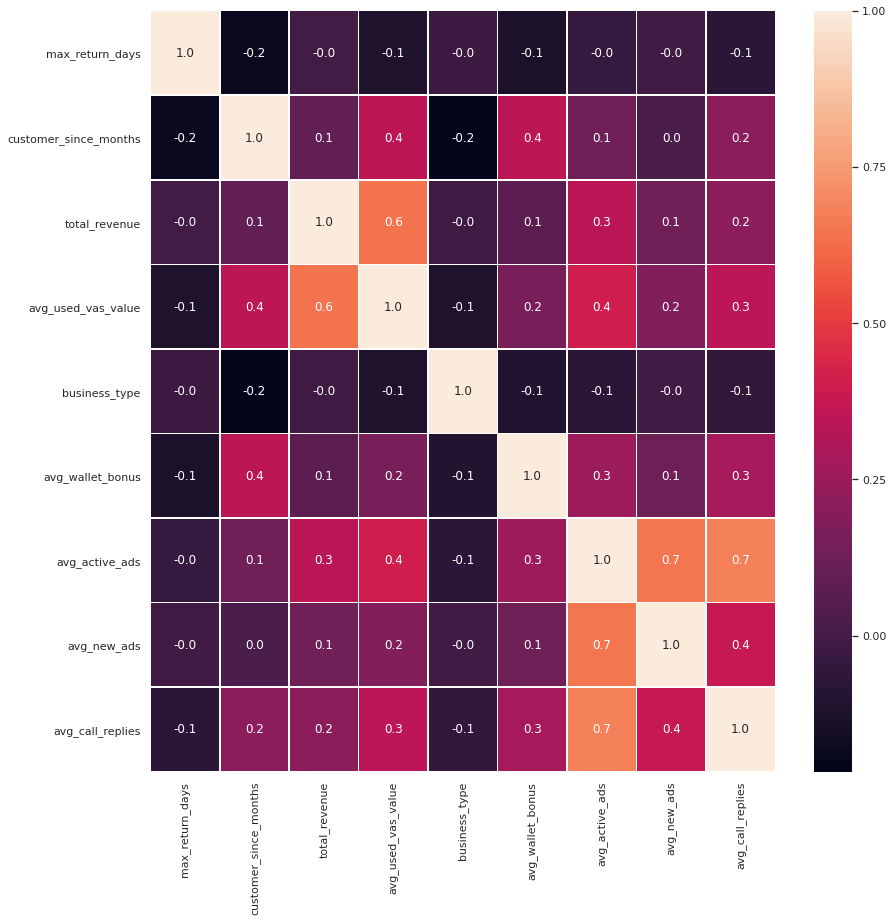

In [35]:
f,ax = plt.subplots(figsize=(14, 14))
sns.heatmap(x_1.corr(), annot=True, linewidths=.5, fmt= '.1f',ax=ax)

In [36]:
# I am using Random Forest Classifier for training our model

Accuracy is:  0.9098484848484848


/home/abhay/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


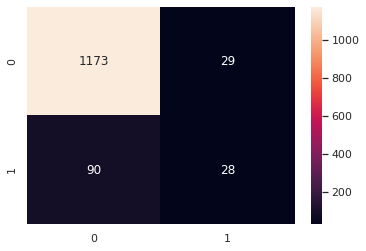

In [37]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import f1_score,confusion_matrix
from sklearn.metrics import accuracy_score

# split data train 70 % and test 30 %
x_train, x_test, y_train, y_test = train_test_split(x_1, y, test_size=0.3, random_state=42)

#random forest classifier with n_estimators=10 (default)
clf_rf = RandomForestClassifier(random_state=43)      
clr_rf = clf_rf.fit(x_train,y_train)

ac = accuracy_score(y_test,clf_rf.predict(x_test))
print('Accuracy is: ',ac)
cm = confusion_matrix(y_test,clf_rf.predict(x_test))
sns.heatmap(cm,annot=True,fmt="d")

In [38]:
# Our accuraccy is 90%

Univariate feature selection and random forest classification

In [39]:
#In univariate feature selection, we will use SelectKBest that removes all but the k highest scoring features

In [40]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)

# find best scored 5 features
select_feature = SelectKBest(chi2, k=5).fit(x_train, y_train)

In [41]:
print('Score list:', select_feature.scores_)
print('Feature list:', x_train.columns)

Score list: [1.98091360e+04 4.06477795e+03 4.36146031e+02 3.75678896e+04
 1.24123765e+03 4.07719946e+02 9.69062198e+03 2.67910289e-01
 3.17622202e+04 4.10109395e+02 5.27462681e+02 1.38532150e+03
 1.80784754e+03 1.81878799e+01]
Feature list: Index(['max_return_days', 'average_return_days', 'customer_since_months',
       'total_revenue', 'average_revenue', 'avg_vas_count',
       'avg_used_vas_value', 'business_type', 'avg_wallet_bonus',
       'avg_active_ads', 'avg_new_ads', 'avg_email_replies',
       'avg_call_replies', 'avg_sms_replies'],
      dtype='object')


/home/abhay/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


Accuracy is:  0.8977272727272727


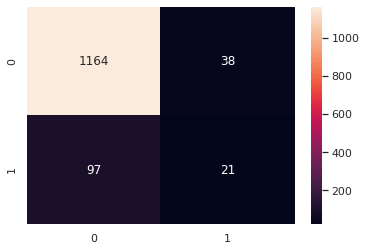

In [42]:

x_train_2 = select_feature.transform(x_train)
x_test_2 = select_feature.transform(x_test)
#random forest classifier with n_estimators=10 (default)
clf_rf_2 = RandomForestClassifier()      
clr_rf_2 = clf_rf_2.fit(x_train_2,y_train)
ac_2 = accuracy_score(y_test,clf_rf_2.predict(x_test_2))
print('Accuracy is: ',ac_2)
cm_2 = confusion_matrix(y_test,clf_rf_2.predict(x_test_2))
sns.heatmap(cm_2,annot=True,fmt="d")

Recursive feature elimination (RFE) with random forest

In [43]:
from sklearn.feature_selection import RFE
# Create the RFE object and rank each pixel
clf_rf_3 = RandomForestClassifier()      
rfe = RFE(estimator=clf_rf_3, n_features_to_select=5, step=1)
rfe = rfe.fit(x_train, y_train)

/home/abhay/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/home/abhay/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/home/abhay/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/home/abhay/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/home/abhay/anaconda3/lib/python3.7/site-package

In [44]:
print('Chosen best 5 feature by rfe:',x_train.columns[rfe.support_])


Chosen best 5 feature by rfe: Index(['max_return_days', 'customer_since_months', 'avg_active_ads',
       'avg_new_ads', 'avg_call_replies'],
      dtype='object')


Recursive feature elimination with cross validation and random forest classification

In [45]:
#Now we will not only find best features but we also find how many features do we need for best accuracy.

In [46]:
from sklearn.feature_selection import RFECV

# The "accuracy" scoring is proportional to the number of correct classifications
clf_rf_4 = RandomForestClassifier() 
rfecv = RFECV(estimator=clf_rf_4, step=1, cv=5,scoring='accuracy')   #5-fold cross-validation
rfecv = rfecv.fit(x_train, y_train)

print('Optimal number of features :', rfecv.n_features_)
print('Best features :', x_train.columns[rfecv.support_])

/home/abhay/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/home/abhay/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/home/abhay/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/home/abhay/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/home/abhay/anaconda3/lib/python3.7/site-package

Optimal number of features : 7
Best features : Index(['max_return_days', 'average_return_days', 'customer_since_months',
       'avg_active_ads', 'avg_new_ads', 'avg_email_replies',
       'avg_call_replies'],
      dtype='object')


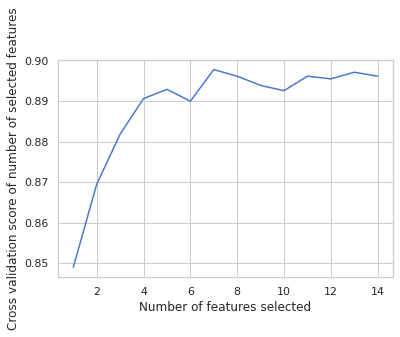

In [47]:
# Plot number of features VS. cross-validation scores
import matplotlib.pyplot as plt
plt.figure()
plt.xlabel("Number of features selected")
plt.ylabel("Cross validation score of number of selected features")
plt.plot(range(1, len(rfecv.grid_scores_) + 1), rfecv.grid_scores_)
plt.show()

In [48]:
clf_rf_5 = RandomForestClassifier()      
clr_rf_5 = clf_rf_5.fit(x_train,y_train)
importances = clr_rf_5.feature_importances_
std = np.std([tree.feature_importances_ for tree in clf_rf.estimators_],
             axis=0)
indices = np.argsort(importances)[::-1]

# Print the feature ranking
print("Feature ranking:")

for f in range(x_train.shape[1]):
    print("%d. feature %d (%f)" % (f + 1, indices[f], importances[indices[f]]))

Feature ranking:
1. feature 9 (0.117727)
2. feature 10 (0.116599)
3. feature 2 (0.109646)
4. feature 1 (0.105368)
5. feature 0 (0.102205)
6. feature 11 (0.095182)
7. feature 12 (0.085575)
8. feature 6 (0.080471)
9. feature 5 (0.052765)
10. feature 7 (0.045751)
11. feature 8 (0.042748)
12. feature 13 (0.026175)
13. feature 4 (0.011484)
14. feature 3 (0.008305)


/home/abhay/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


In [49]:
# Final model  for SHAP

/home/abhay/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


Accuracy is:  0.9098484848484848


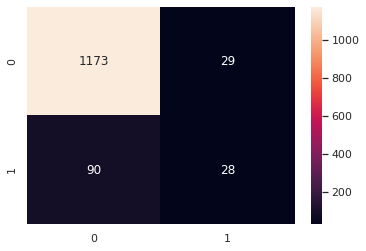

In [50]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import f1_score,confusion_matrix
from sklearn.metrics import accuracy_score

# split data train 70 % and test 30 %
x_train, x_test, y_train, y_test = train_test_split(x_1, y, test_size=0.3, random_state=42)

#random forest classifier with n_estimators=10 (default)
clf_rf = RandomForestClassifier(random_state=43)      
clr_rf = clf_rf.fit(x_train,y_train)

ac = accuracy_score(y_test,clf_rf.predict(x_test))
print('Accuracy is: ',ac)
cm = confusion_matrix(y_test,clf_rf.predict(x_test))
sns.heatmap(cm,annot=True,fmt="d")

Using SHAP library for calculating Shapley values for a Random Forest Classifier

In [51]:
import shap 


In [52]:
explainer = shap.TreeExplainer(clf_rf )

In [53]:
#Let's choose some instances from the test dataset to understand to the classifier makes predictions for them.

In [54]:
x_test.iloc[400]

max_return_days           1.0
customer_since_months     2.0
total_revenue             0.0
avg_used_vas_value        0.0
business_type             0.0
avg_wallet_bonus          0.0
avg_active_ads           16.5
avg_new_ads               8.5
avg_call_replies         13.0
Name: 4182, dtype: float64

In [55]:
choosen_instance = x_test.iloc[400]
shap_values = explainer.shap_values(choosen_instance)
shap.initjs()
shap.force_plot(explainer.expected_value[1], shap_values[1], choosen_instance)

What you see above is a force plot visualizing shapley values for the features. Feature values in pink cause to increase the prediction. Size of the bar shows the magnitude of the feature's effect. Feature values in blue cause to decrease the prediction. Sum of all feature SHAP values explain why model prediction was different from the baseline.

In [56]:
shap_values = explainer.shap_values(x_test)


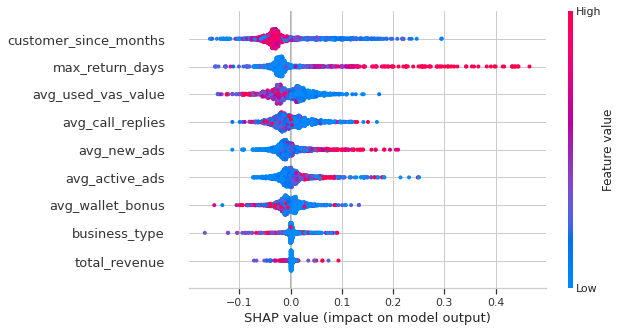

In [57]:
shap.summary_plot(shap_values[1], x_test)

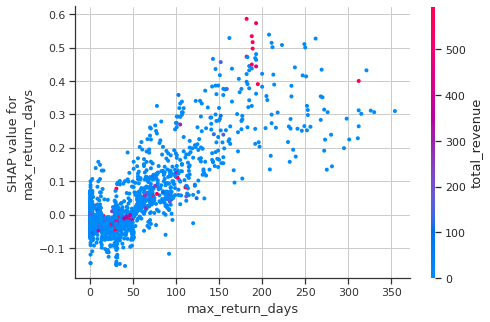

In [58]:
import shap  # package used to calculate Shap values

# Create object that can calculate shap values
explainer = shap.TreeExplainer(clf_rf)

# calculate shap values. This is what we will plot.
shap_values = explainer.shap_values(x_1)

# make plot.
shap.dependence_plot('max_return_days', shap_values[1], x_1, interaction_index="total_revenue")